In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
data = pd.read_csv(r"C:\Users\Dell\Desktop\Shubham\SEM7\AIML\EXP6\fetal_health.csv") 
df = data[data.fetal_health != 2] 
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
1,132,0.006,0.0,0.006,0.003,0.0,0.000,17,2.1,0,130,68,198,6,1,136,140,12,0,1
2,133,0.003,0.0,0.008,0.003,0.0,0.000,16,2.1,0,130,68,198,5,1,135,138,13,0,1
3,134,0.003,0.0,0.008,0.003,0.0,0.000,16,2.4,0,117,53,170,11,0,134,137,13,1,1
4,132,0.007,0.0,0.008,0.000,0.0,0.000,16,2.4,0,117,53,170,9,0,136,138,11,1,1
5,134,0.001,0.0,0.010,0.009,0.0,0.002,26,5.9,0,150,50,200,5,3,107,107,170,0,3


In [2]:
features = df.iloc[:,:-1] 
y = df['fetal_health'] 
x = features.to_numpy() 
y = y.to_numpy()

In [3]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [4]:

gnb = GaussianNB() 
gnb.fit(X_train, y_train) 
y_pred = gnb.predict(X_test)
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100) 
con_mat = confusion_matrix(y_test, y_pred)

Gaussian Naive Bayes model accuracy(in %): 96.18528610354224


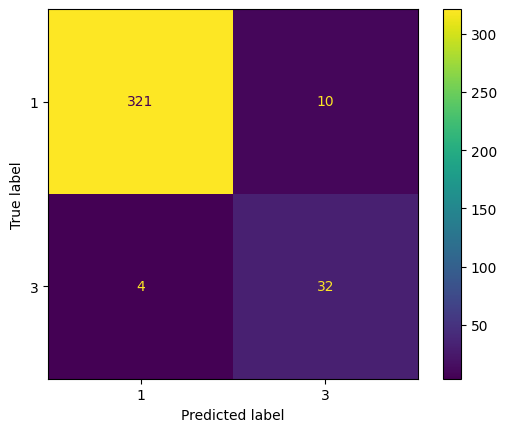

In [5]:
import matplotlib.pyplot as plt 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels = [1,3]) 
cm_display.plot() 
plt.show()

In [6]:
Accuracy = metrics.accuracy_score(y_test, y_pred) 
Precision = metrics.precision_score(y_test, y_pred) 
recall = metrics.recall_score(y_test, y_pred) 
Specificity = metrics.recall_score(y_test, y_pred, pos_label=3) 
F1_score = metrics.f1_score(y_test, y_pred)

In [7]:
print({"Accuracy":Accuracy,"Precision":Precision,"Recall":recall,"Specificity":Specificity,"F1_score":F1_score}) 
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train))) 
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

{'Accuracy': 0.9618528610354223, 'Precision': 0.9876923076923076, 'Recall': 0.9697885196374623, 'Specificity': 0.8888888888888888, 'F1_score': 0.9786585365853658}
Training set score: 0.9460
Test set score: 0.9619
